<a href="https://colab.research.google.com/github/whistle-hikhi/perceptron_learning_algorithm/blob/main/perceptron_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def _activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self._activation(x) for x in linear_output])

def generate_data(n_samples=100):
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    y = (X[:, 1] > X[:, 0]).astype(int)
    return X, y

def plot_results(X, y, perceptron):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Use plt.contourf instead of matplotlib.contourf
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Perceptron Decision Boundary')
    plt.show()

Accuracy: 0.99


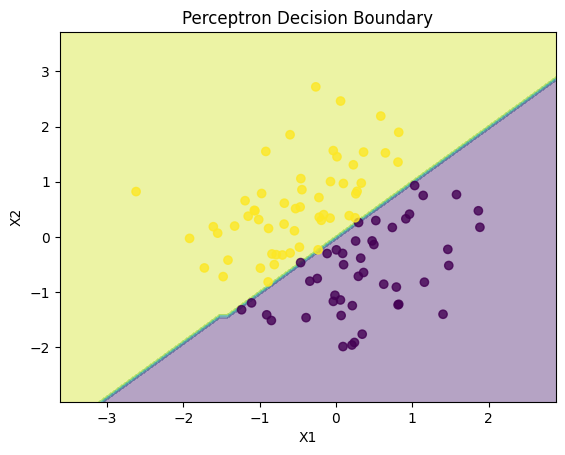

In [29]:
X, y = generate_data()
perceptron = Perceptron(learning_rate=0.1, n_epochs=10)
perceptron.fit(X, y)
predictions = perceptron.predict(X)
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")
plot_results(X, y, perceptron)